In [2]:
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import os
from tqdm import tqdm

In [3]:
os.chdir('C:\\Users\\chandan.malla\\Desktop\\Data Science_chandan\\Applied AI notes\\NLP\\Amazon Fine Food reviews')
os.listdir()

['.ipynb_checkpoints',
 'BOW,TFIDF,W2V,AVGw2v, avg tfidif.ipynb',
 'database.sqlite',
 'dsfds.png',
 'final2.sqlite',
 'GoogleNews-vectors-ngative300.bin',
 'hashes.txt',
 'Pre-Proccessed_30000.sqlite',
 'Pre-Proccessed_Stemmed_30.sqlite',
 'Pre-Proccessed_Stemmed_30000.sqlite',
 'Pre-Processed_30000.sqlite',
 'Reviews.csv']

In [4]:
con = sqlite3.connect('./database.sqlite')
raw_data = pd.read_sql_query('select * from reviews',con)

In [5]:
temp = raw_data['Score']
temp = temp.map(lambda x:1 if x>3 else 0)
raw_data['Score'] = temp
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
final = raw_data.drop_duplicates({'UserId','ProfileName', 'Time','Text'},keep = 'first' , inplace = False)

In [7]:
final = final[final['HelpfulnessNumerator']<=final['HelpfulnessDenominator']]

In [8]:
#######Sample only 30000 points
final = final.sample(n=3000,random_state=0).reset_index()

In [9]:
##### regular Expression https://pymotw.com/2/re
from bs4 import BeautifulSoup
import re
##Remove all http links
def remhttp(text): 
    text = re.sub(r'http\S+',' ',text) ##\S is all the non-whitespace character + - one or more
    return text

##Remove all html tags
def remhtml(text):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text()
    return text

##Remove all punct. or special characters
def remchar(text):
    text = re.sub(r'[^A-Za-z0-9\s]+',' ',text)
    return text

##Remove all words less than 3 letters
#def remles2letter(text):
 #   text = re.sub(r'\W*\b\w{1,3}\b',' ',text)
  #  return text
##convert to lower
def lower(text):
    text = text.lower()
    return text


def allconvert(text):
    return lower(remchar(remhtml(remhttp(text))))
final['Score'][1]

1

In [10]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#import nltk
#nltk.download('stopwords')                                     download stopwords

#stop = set(stopwords.words('english'))

##we can use set stopwords manually also.
stop= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
sno = SnowballStemmer('english')
#stop = set(stopwords.words('english'))
print(stop)

{'both', 'am', 'll', "you're", 'in', 've', 'will', 'her', 'was', "that'll", 'while', "wouldn't", 'ours', 'shouldn', 'are', "hasn't", 'why', 'each', 'that', 'me', "it's", 'too', "hadn't", 'herself', "mustn't", 'br', 'here', 'were', 'those', 'should', 'now', "haven't", 'ma', 'doesn', 'until', "couldn't", 'they', 'below', 'during', 'yourself', 'yours', 'these', 'hasn', 'isn', 'if', "weren't", 'for', 'again', 'how', 's', 'and', 'who', "you've", 'more', 'm', 'doing', 'over', 'only', 'after', 'it', 'where', 'them', 'wasn', "aren't", 'between', 'don', 'most', 're', 'its', 'himself', 'being', 'as', 'needn', 'having', 'hadn', 'just', 'theirs', 'whom', 'from', "shouldn't", 'haven', 'further', 'is', 'there', 'own', 'did', 'against', "needn't", 'does', 'at', "won't", 'so', 'had', 'through', 'an', 'down', "you'd", 'can', 'other', 'by', "mightn't", 'she', 'my', 'him', 'you', 'he', 'y', 'ain', 'didn', 'myself', "should've", 'about', 'their', "you'll", 'have', 'to', 'couldn', 'very', 'all', 'same', 't

In [11]:
###CODE to do actual Pre-Processing for ['Text']:

i=-1
all_positive_words=[]
all_negative_words=[]
final_text=[]
for text in final['Text']:
    i = i+1
    filtered_words=[]
    text = allconvert(text)
    for w in text.split():
        if (w not in stop):
            s =(sno.stem(w))
            filtered_words.append(s)
            if (final['Score'].values)[i]==1:
                all_positive_words.append(w)
            if (final['Score'].values)[i]==0:
                all_negative_words.append(w)
        else:
            continue
    str =' '.join(filtered_words)
    final_text.append(str)


                
    

In [12]:
final['Cleanedtext'] = final_text


In [13]:
sorted_data=final.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

# BOW

Here the fit method, when applied to the training dataset,learns the model parameters (for example, mean and standard deviation). We then need to apply the transform method on the training dataset to get the transformed (scaled) training dataset. We could also perform both of this steps in one step by applying fit_transform on the training dataset.

Then why do we need 2 separate methods - fit and transform ?

In practice we need to have a separate training and testing dataset and that is where having a separate fit and transform method helps. We apply fit on the training dataset and use the transform method on both - the training dataset and the test dataset. Thus the training as well as the test dataset are then transformed(scaled) using the model parameters that were learnt on applying the fit method the training dataset.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(sorted_data['Cleanedtext'],sorted_data['Score'],test_size=0.3,random_state=0)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

#Min_df When building the vocabulary ignore terms that
##have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. 
#Max_features : If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.


train_bow = count_vect.fit_transform(sorted_data['Cleanedtext'])
#test_bow = count_vect.transform(x_test)
#CV_bow = count_vect.transform(x_cv)

TFIDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_count_vect = TfidfVectorizer(min_df=10, max_features=500,ngram_range=(1,2))
train_tfidf = tfidf_count_vect.fit_transform(x_train)
test_tfidf = tfidf_count_vect.transform(x_test)
#CV_tfidf = tfidf_count_vect.transform(x_cv)

NameError: name 'x_train' is not defined

# K-Means for BOW

In [17]:
x_train

NameError: name 'x_train' is not defined

In [18]:
# Standardization
std = StandardScaler(with_mean = False)
train_bow = std.fit_transform(train_bow)

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from wordcloud import WordCloud, STOPWORDS

In [20]:
def optimal_K(input_data):
    loss=[]
    k = np.arange(2,15)
    for i in k:
        clf = KMeans(n_clusters=i)
        clf.fit(train_bow)
        loss.append(clf.inertia_)
    plt.plot(k,loss)
    plt.title("Elbow method to choose k")
    plt.xlabel("K")
    plt.ylabel("Loss")
    plt.show()

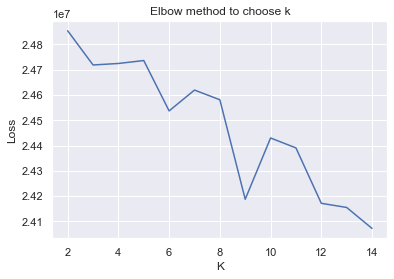

In [21]:
optimal_K(train_bow)

In [22]:
clf = KMeans(n_clusters=11)
clf.fit(train_bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [175]:
def plot_word_cloud(txt):
    # store each word from review
    cloud = " ".join(word for word in txt)
    #cloud =txt
    # Remove duplicate words
    stopwords = set(STOPWORDS)
    # call built-in method WordCloud for creating an object for drawing a word cloud 
    wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', stopwords = stopwords).generate(cloud)
    # plot the WordCloud image             
    print(wordcloud)
    plt.figure(figsize = (10, 8))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off") 
    plt.title("World cloud of reviews")
    plt.tight_layout(pad = 0)
  
    plt.show()

SyntaxError: invalid syntax (<ipython-input-175-7dd5b2364175>, line 6)

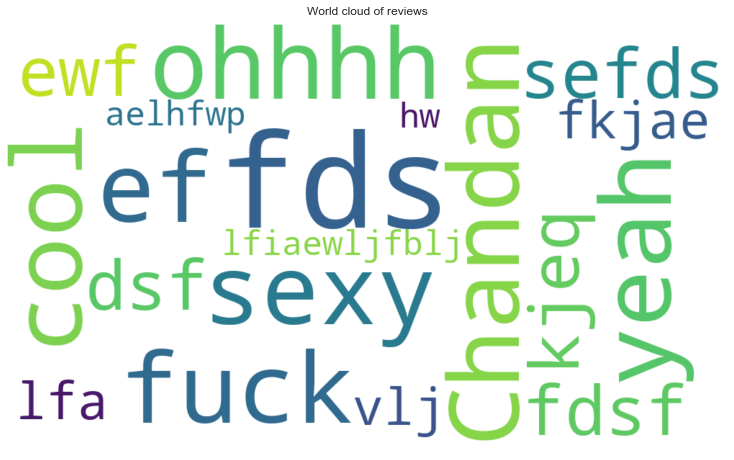

In [23]:
#Plot each cluster features in a cloud
def plot_cluster_cloud(features, coef):
    coef_df = pd.DataFrame(coef, columns = features)
    #print(coef_df)
    print(len(coef_df))
    # Create a figure and set of 15 subplots because our k range is in between 
    fig, axes = plt.subplots(5, 3, figsize = (30, 20))
    fig.suptitle("Top 20 words for each cluster ", fontsize = 50)
    cent = range(len(coef_df))
    tip = zip(axes.flat, cent)
    print(tip)
    for ax, i in zip(axes.flat, cent):
        wordcloud = WordCloud(background_color = "white").generate_from_frequencies(coef_df.iloc[i,:].sort_values(ascending = False)[0:20])
        ax.imshow(wordcloud)
        ax.set_title("Cluster {} word cloud".format(i+1), fontsize = 30)
        ax.axis("off")
    plt.tight_layout()
    fig.subplots_adjust(top = 0.90)
    plt.show()

11


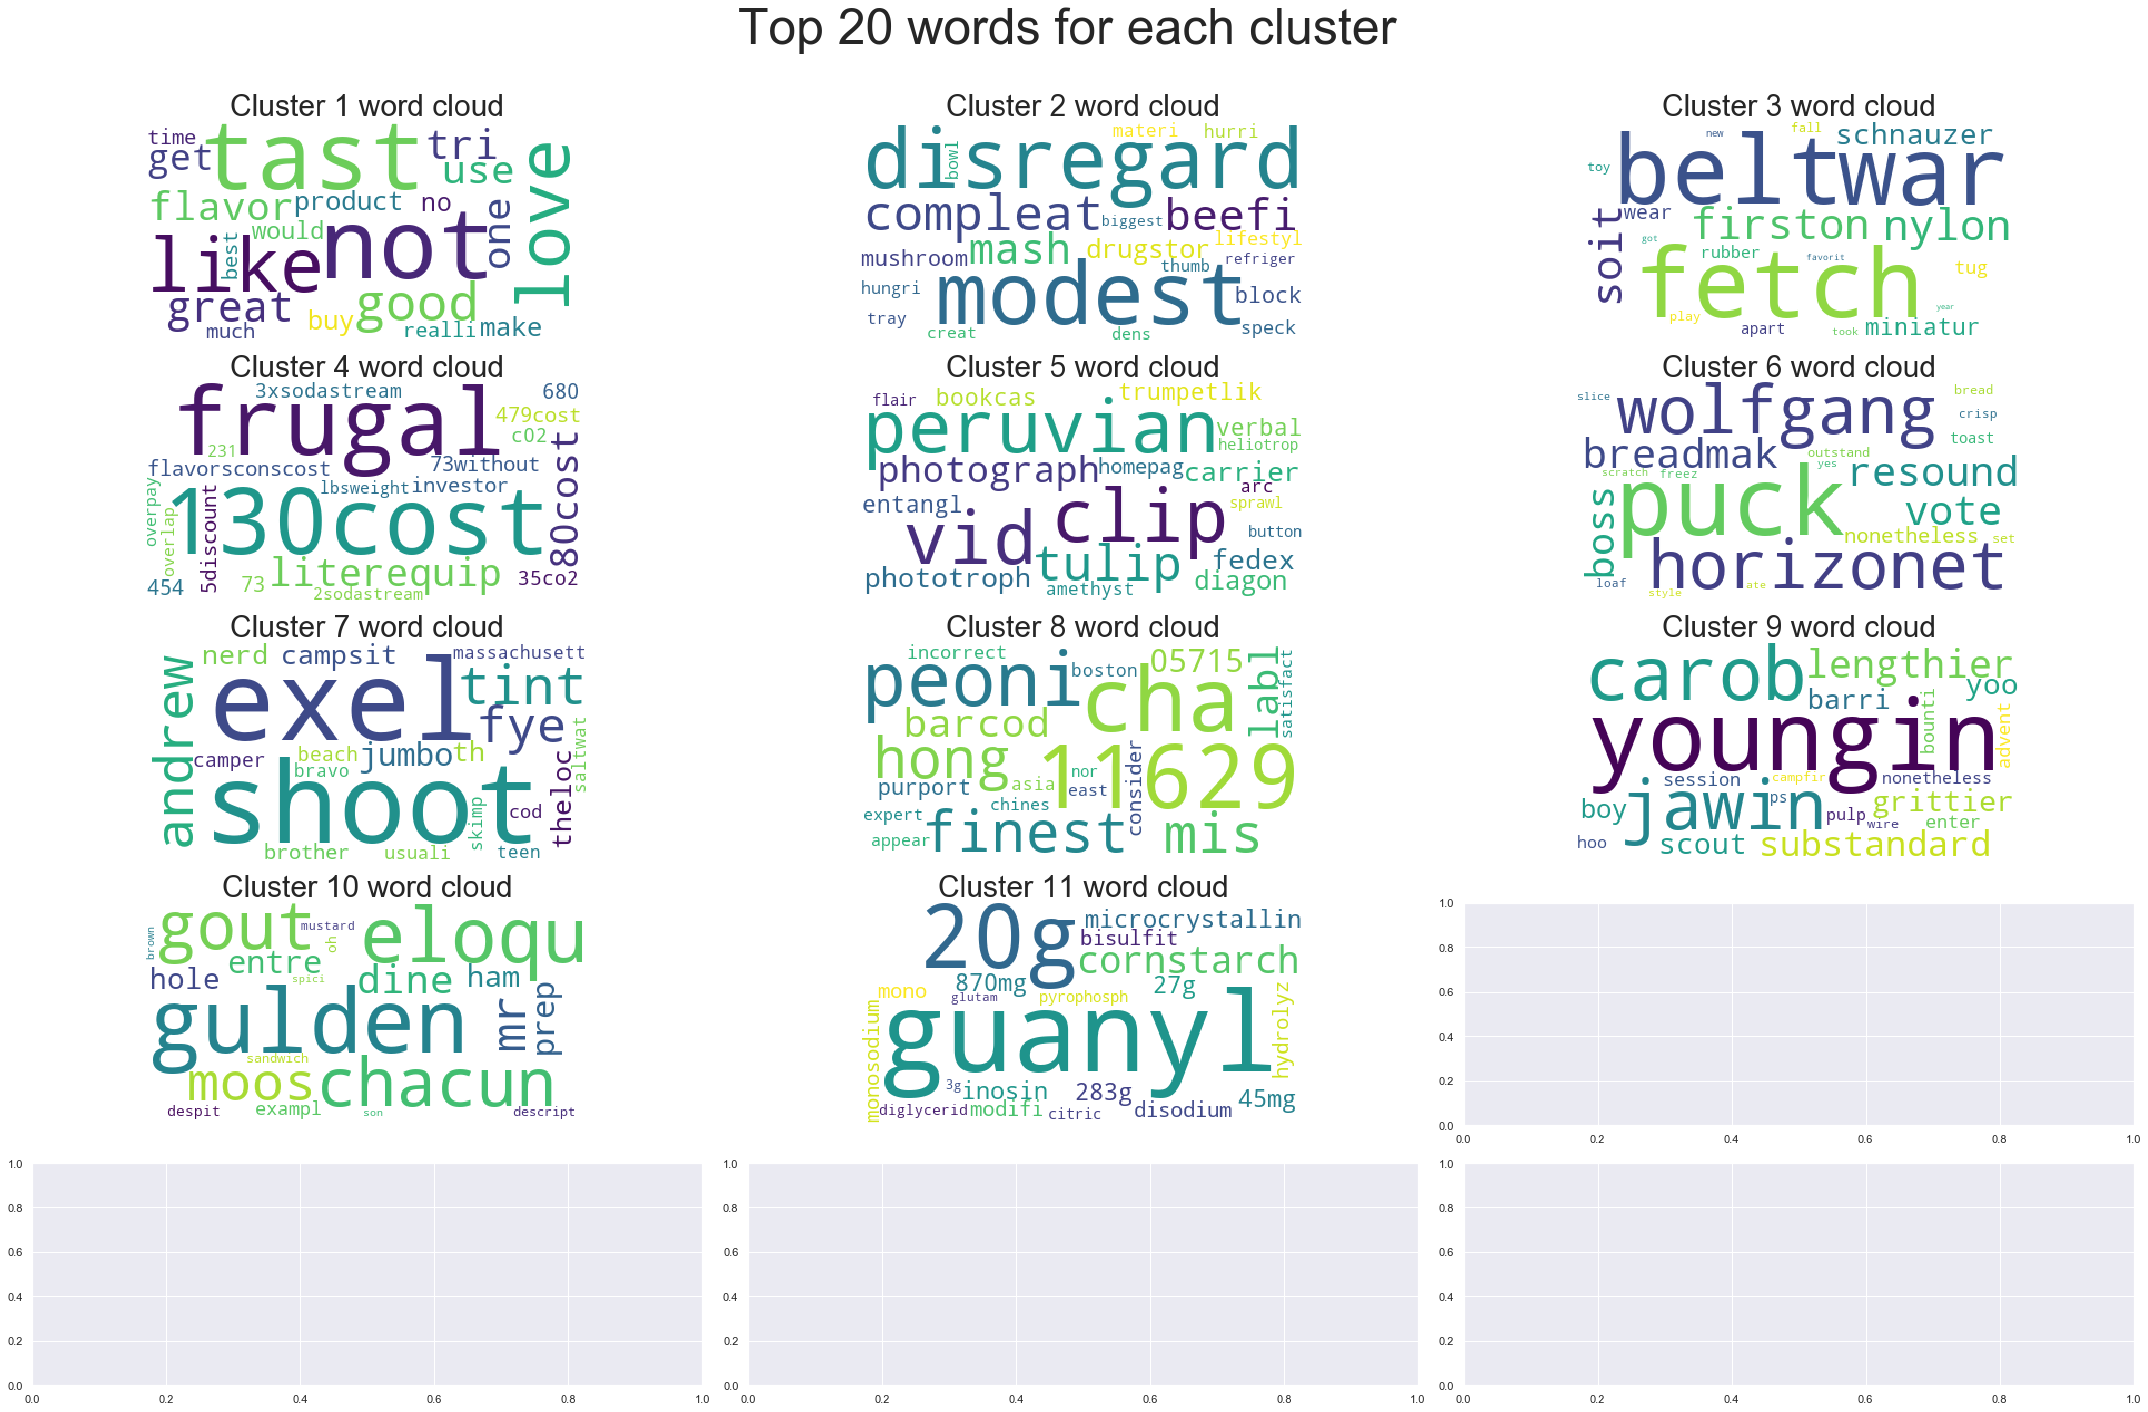

In [24]:
features = count_vect.get_feature_names()
coef = clf.cluster_centers_
plot_cluster_cloud(features, coef)

# Hierachical Clustering

In [109]:

# There is no appropiate method to choose number of cluster, so we can just give a try with different number of cluster.
# Somewhere dendogram is used to choose number of cluster for hirarchical clustering but again it's very hard question to answer-->"where you will cut in dendrogram to choose n_cluster?"
# When number of cluster is 2
# using euclidean distance as affinity to compute distances b/w clusters
# and linkage is ward that minimizes the variance of the clusters being merged and it only used with the euclidean distance
# We can use any linkage and affinity but ward is recommended 
clf = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
labels = clf.fit_predict(train_bow.toarray())

In [96]:
clf.labels_

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [111]:
final["cluster_label"] = clf.labels_

In [173]:
for i in range(clf.n_clusters):
    l1 = list()
    label2 = final.groupby(["cluster_label"]).groups[i]
    print(len(label2))
    for j in range(len(label2)):
        l1.append(final.loc[label2[j]]["Cleanedtext"])
    print("Total number of review in cluster {} is: {}".format(i, len(label2)))
    plot_word_cloud(l)


2999
Total number of review in cluster 0 is: 2999


TypeError: expected string or bytes-like object

In [168]:
label = final.groupby(["cluster_label"]).groups[1]
label = final.groupby(["cluster_label"]).groups[0]


len(label)

2999

In [170]:
final.loc[label[2]]["Cleanedtext"]

'vietnames friend introduc hook sinc need one individu metal coffe siev purchas vietnames groceri 2 3 take 20 30 minut coffe complet drain add boil water add sweeten condens milk tast vietnames drink ice drink hot like like expresso strong hint chocol make quit yummi'

In [151]:
l1

['two 15 1 2 year old cat like hope encourag eat drink gain weight lose weight notic especi put long time buddi australian shepherd sleep realli miss friend start downward spiral use addit can dri cat food']

################################################
Some Problem with data, can not print wordcloud

# DB Scan

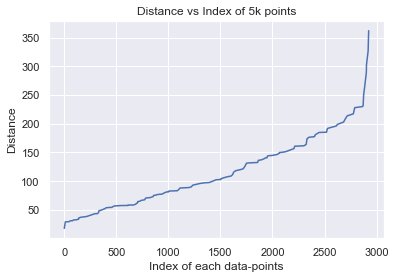

In [192]:
# Elbow method to choose eps(epsilon)
# To compute distance from each data-points to its 50th neighbors
from sklearn.neighbors import NearestNeighbors
# As the Rule of thumb is to take 2 * d(dimension) for minpts but we are not taking because the total no of points we have is 5k and dimension of data is 11k.
# Variable with minpts equal to 50 
minpts = 50
# Dictionary to store distance and index 
d = {}
# sklearn Nearest neighbors classifier with number of neighbors = minpts(50)
clf = NearestNeighbors(n_neighbors = minpts, metric = "euclidean")
# Fitting classifier
clf.fit(train_bow)
# Find the k neighbors(in our case it is 50) of each xi and will return distance to its neighbors and indices of each xi's
dist_idx = clf.kneighbors(n_neighbors = minpts, return_distance = True)
dist_idx = np.array(dist_idx)
# Get the distance and indices of the last neighbor
for dist, idx in zip(dist_idx[0], dist_idx[1]):
    d[idx[-1]] = dist[-1]
# Sort distances according to ascending order
sorted_d = sorted((value,key) for (key, value) in d.items())
distance = []
index = []
# Get the index and distance and store it in two different variable
for d, i in sorted_d:
    distance.append(d)
    index.append(i)
# Plot index on x-axis and distance on y-axis
plt.plot(sorted(index), distance)
plt.title("Distance vs Index of 5k points")
plt.xlabel("Index of each data-points")
plt.ylabel("Distance")
plt.show()

In [194]:
# DBSCAN with eps 300 and min_sample 50 
# Typically, We choose min_points is equal to the 2 times of dimension of the data-points or 
# If we have noisy data then we take large min_points or according to the domain experts
# We choose hyperparameter eps(epsilon) by calculaing the distance from each points and sort them in increasing order and then plot, where the knee occur we take it as the eps value from distance. 
# https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
# https://stats.stackexchange.com/questions/79470/how-to-compare-dbscan-clusters-choose-epsilon-parameter?rq=1
clf = DBSCAN(eps = 150, min_samples = 50)
clf.fit(train_bow)

DBSCAN(algorithm='auto', eps=150, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=None, p=None)

In [195]:
# -1 denotes it is noisy points
print("Total number of cluster with label -1 is: ", list(clf.labels_).count(-1))
print("total number of cluster with label 0 is: ", list(clf.labels_).count(0))

Total number of cluster with label -1 is:  214
total number of cluster with label 0 is:  2786


In [196]:
# Assign each datapoints to its corresponding cluster
final["cluster_label"] = clf.labels_

In [199]:
for i in range(len(set(clf.labels_)) - 1):
    l = list()
    label = final.groupby(["cluster_label"]).groups[i]
    for j in range(len(label)):
            l.append(final.loc[label[j]]["Cleanedtext"])
    print("Total number of review in cluster {} is: {}".format(i, len(label)))
    plot_word_cloud(l)

Total number of review in cluster 0 is: 2786


TypeError: expected string or bytes-like object